## Описание проекта
Контекст.
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## <a href = '#ch1'>Часть 1. Приоритизация гипотез </a>


 - <a href = '#ch1_1'>Фреймворк ICE для приоритизации гипотез.</a>
 - <a href = '#ch1_2'>Фреймворк RICE для приоритизации гипотез.</a>
 - <a href = '#ch1_3'>Вывод.</a>

## <a href = '#ch2'>Часть 2. Анализ A/B-теста</a>


 - <a href = '#ch2_1'>График кумулятивной выручки по группам. </a>
 - <a href = '#ch2_2'>График кумулятивного среднего чека по группам.</a>
 - <a href = '#ch2_3'>График относительного изменения кумулятивного среднего чека группы B к группе A.</a>
 - <a href = '#ch2_4'>График кумулятивной конверсии по группам.</a>
 - <a href = '#ch2_5'>График относительного изменения кумулятивной конверсии группы B к группе A.</a>
 - <a href = '#ch2_5_1'>Анализ выбросов и всплесков: крайние значения данных.</a>
 - <a href = '#ch2_6'>Точечный график количества заказов по пользователям.</a>
 - <a href = '#ch2_7'>Граница аномальных пользователей, 95-й и 99-й перцентили количества заказов на пользователя.</a>
 - <a href = '#ch2_8'>Точечный график стоимостей заказов.</a>
 - <a href = '#ch2_9'>Граница аномальных заказов, 95-й и 99-й перцентили стоимости заказов.</a>
 - <a href = '#ch2_9_1'>Проверка статистической значимости.</a>
 - <a href = '#ch2_10'>Статистическая значимость различий в конверсии между группами по «сырым» данным.</a>
 - <a href = '#ch2_11'>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.</a>
 - <a href = '#ch2_12'>Статистическая значимость различий в конверсии между группами по «очищенным» данным.</a>
 - <a href = '#ch2_13'>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.</a>
 - <a href = '#ch2_14'>Вывод</a>

_______

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#hypothesis = pd.read_csv('hypothesis.csv')
#orders = pd.read_csv('orders.csv')
#visitors = pd.read_csv('visitors.csv')


## <a id='ch1'>Приоритизация гипотез</a>

In [8]:
hypothesis.columns = hypothesis.columns.str.lower()

In [9]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### <a id='ch1_1'>Фреймворк ICE</a>

In [10]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [11]:
hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


В приоретете по способу ICE первые три места занимают гипотезы: 
1. 8 - Запустить акцию, дающую скидку на товар в день..
2. 0 - Добавить два новых канала привлечения трафика,...
3. 7 - Добавить форму подписки на все основные страни...


### <a id='ch1_2'>Фреймворк RICE</a>

In [12]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [13]:
hypothesis[['hypothesis','rice']].sort_values('rice', ascending=False)

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В приоретете по способу ICE первые три места занимают гипотезы: 
1. 7 - Добавить форму подписки на все основные страни...
2. 2 - Добавить блоки рекомендаций товаров на сайт ин...
3. 0 - Добавить два новых канала привлечения трафика,...	

## <a id='ch1_3'>Вывод</a>

В тройку лидеров при способе приоритизации ICE и RICE входят две гипотезы под № 7 и № 0, только вот располагаются в разных порядках. Так же в способе ICE на первое место выходит гипотеза под №8 , а вот в методе RICE она занимает лишь 5 место и в тройку лидеров попадает гипотеза под №2. Дело в том, что в методе RICE оценивается параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести) и у гипотезы №8 этот параметр равен 1, что в расчетах дает этой гипотезе меньший общий коэффицент.



##  <a id='ch2'>Анализ A/B-теста</a>

In [14]:
#visitors.head()

In [15]:
#visitors.info()

In [16]:
#orders.head()

In [17]:
#orders.info()

In [18]:
#Меняем на нужный тип данных в датах.
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
# создаем массив уникальных пар значений дат и групп теста.
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
# собираем агрегированные кумулятивные по дням данные о заказах.
ordersAggregated = \
datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [21]:
# собираем агрегированные кумулятивные по дням данные о посетителях.
visitorsAggregated = \
datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

##### <a id='ch2_1'>График кумулятивной выручки по группам.</a>

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date','group'], right_on = ['date','group'])

In [23]:
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

In [24]:
# выделяем группы.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'transactions']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'transactions']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


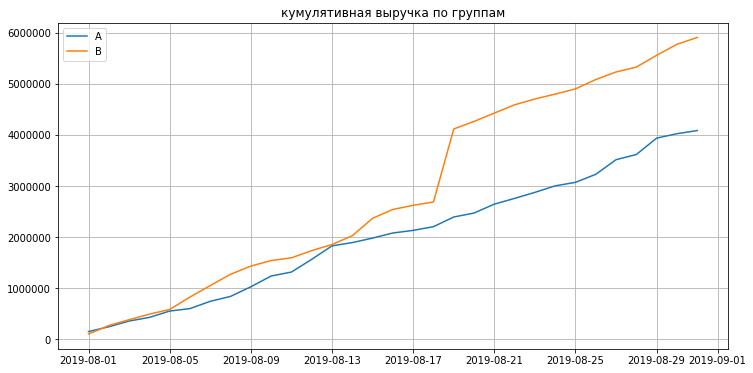

In [25]:
plt.figure(figsize=(12,6))
plt.title('кумулятивная выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.grid(True)

Группа В лучше практически с самого начала испытания, так же видно, что примерно 18 августа произошел резкий скачок в группе B, возможно, это связано с аномально большими заказами. 



##### <a id='ch2_2'>График кумулятивного среднего чека по группам.</a>

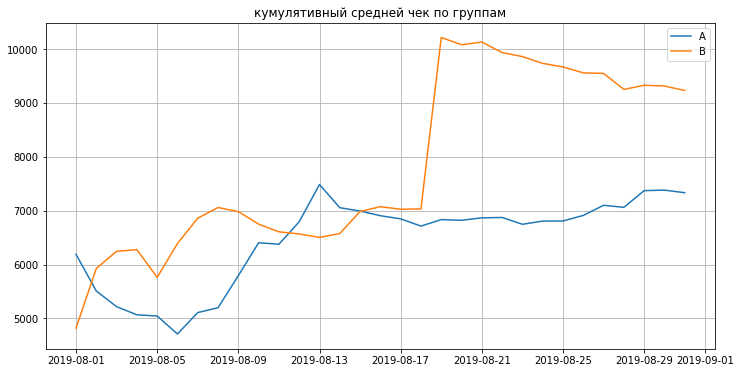

In [26]:
plt.figure(figsize=(12,6))
plt.title('кумулятивный средней чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.legend()
plt.grid(True)

Видны аномальные выбросы и колебания вначале испытания у обеих групп, а так же у группы В имеется тот же резкий выброс 18 августа. Группа В на графике лучше А, но нужно учесть и отфильтровать выбросы, что бы с точностью это утверждать.  

##### <a id='ch2_3'>График относительного изменения кумулятивного среднего чека группы B к группе A.</a>

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on = 'date', right_on= 'date', how = 'left', suffixes = ['A','B'])

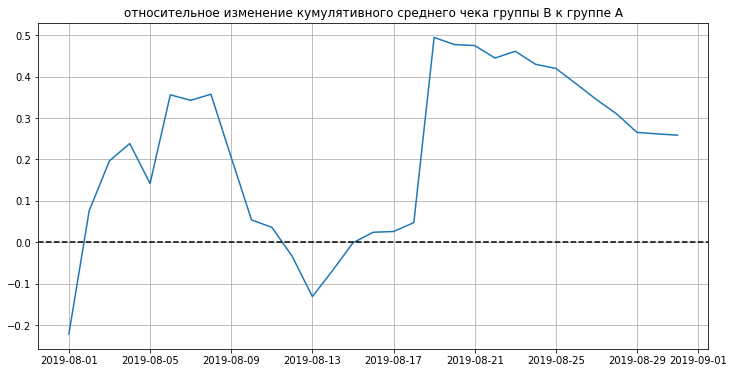

In [28]:
plt.figure(figsize=(12,6))
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')

Относительные различия в среднем чеке резко меняются и колеблются, возможно, в эти даты имеются аномальные заказы, так же заметна тенденция к снижению показателей. 



##### <a id='ch2_4'>График кумулятивной конверсии по группам.</a>

In [29]:
#cumulativeData.head()

In [30]:
#Считаем конверсию
cumulativeData['conversion'] = cumulativeData['transactions'] / cumulativeData['visitors']

In [31]:
#Выделяем группы
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

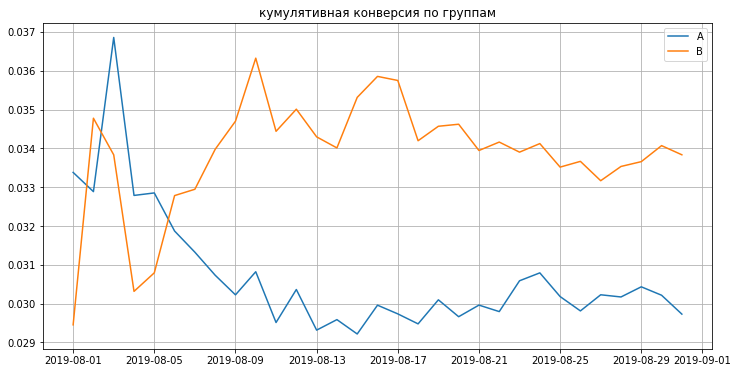

In [32]:
plt.figure(figsize=(12,6))
plt.title('кумулятивная конверсия по группам')
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label='A' )
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label='B' )
plt.legend()
plt.grid()

Заметны сильные колебания, особенно вначале исследования, далее группа В вырывается вперед, пока не заметна фиксация, видна тенденция к снижению и все так же видны колебания групп. 

##### <a id='ch2_5'>График относительного изменения кумулятивной конверсии группы B к группе A.</a>


In [33]:
mergeCumulativeConversion = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on = 'date', right_on='date', how='left', suffixes=['A','B'])

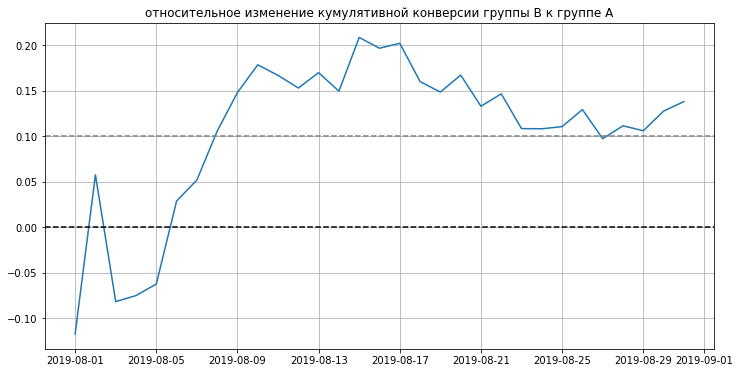

In [34]:
plt.figure(figsize=(12,6))
plt.title('относительное изменение кумулятивной конверсии группы B к группе A')
plt.plot(mergeCumulativeConversion['date']\
         , mergeCumulativeConversion['conversionB'] / mergeCumulativeConversion['conversionA'] - 1)
plt.grid()
plt.axhline(y=0, color='black', linestyle ='--')
plt.axhline(y=0.1, color='grey', linestyle ='--')

Кумулятивная конверсия группы В выигрывает вначале сильно колеблется, но затем выходит вперед, полной стабилизации не наблюдается,в конце наблюдается тенденция к росту, но конверсия группы В явно лучше группы А.

Вывод: 
Графики выше показывают превосходство группы В над группой А, но имеются сильные колебания и выбросы, а так же нет явной стабилизации результатов. Все это, возможно, из-за больших аномальных значений в покупках и посетителях. 



####  <a id='ch2_5_1'>Анализ выбросов и всплесков: крайние значения данных.</a>

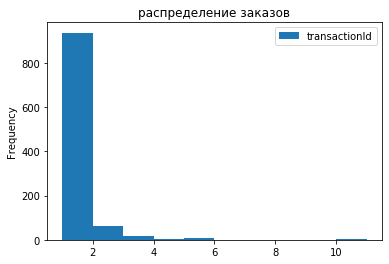

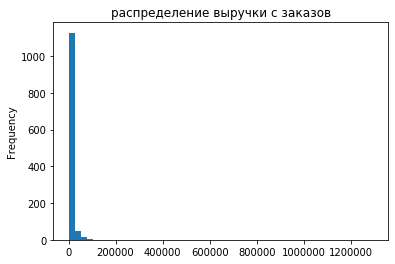

In [35]:
orders.groupby('visitorId').agg({'transactionId':pd.Series.nunique}).plot(kind='hist', title='распределение заказов')
plt.show()
orders['revenue'].plot(kind='hist', bins=50, title='распределение выручки с заказов')
plt.show()

In [36]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Хорошо видны выбросы в заказах, чаще люди делают всего 1 заказ, но есть 5 и более 10 заказов. Что касается выручки с заказа, то на графике видно, что имеются очень крупные заказы, так же это подтверждается методом describe, где максимальный заказ более 1,2 миллиона.


_____

##### <a id='ch2_6'>Точечный график количества заказов по пользователям.</a>

In [38]:
transactionsBYusers = orders.groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})

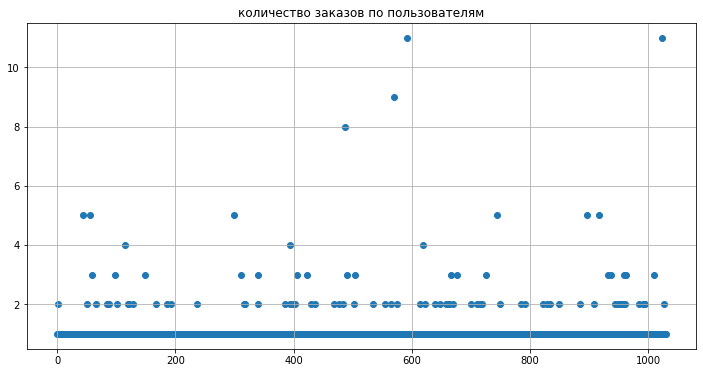

In [39]:
x_values = pd.Series(range(0,len(transactionsBYusers)))
plt.figure(figsize=(12,6))
plt.title('количествo заказов по пользователям')
plt.scatter(x_values, transactionsBYusers['transactionId'])
plt.grid()

Большинство делает 1 заказ, так же видна большая группа пользователей сделавших 2 заказа, не совсем понятно насколько группы велики. 

##### <a id='ch2_7'>Граница аномальных пользователей, 95-й и 99-й перцентили количества заказов на пользователя.</a>


In [40]:
print(np.percentile(transactionsBYusers['transactionId'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей делали больше чем 2 заказа. Менее 1 % пользователей делали более 4х заказов. Можно отсечь всех аномальных пользователей, которые делали более 2 заказов. 



##### <a id='ch2_8'>Точечный график стоимостей заказов.</a>


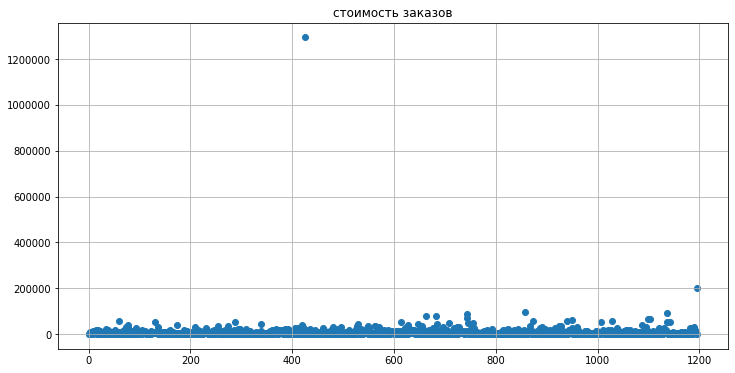

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12,6))
plt.title('cтоимость заказов')
plt.scatter(x_values, orders['revenue'])
plt.grid()

Виден выброс заказа более чем в 1,2 миллиона, но сложно определить граицу из аномальных запасов, лучше посмотреть на перцентилях. 



#####  <a id='ch2_9'>Граница  аномальных заказов, 95-й и 99-й перцентили стоимости заказов.</a>

In [42]:
print(np.percentile( orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% пользователей делают заказы в сумму больше 28000, и так же не больше 1% делают заказы в сумму более чем 59000. Установив аномальную границу в 28000 мы отсечем все аномальные выбросы. 

_____

## <a id='ch2_9_1'>Проверка статистической значимости.</a>


In [43]:
#количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [44]:
#количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
.agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [45]:
#количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date','visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [46]:
#количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
.agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [47]:
#количество заказов в выбранную дату в группе A
ordersADaily = orders[orders['group'] == 'A'][['date','transactionId','revenue']]\
.groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})

ordersADaily.columns = ['date','transactionPerDateA', 'revenuePerDateA']

In [48]:
#суммарное число заказов до выбранной даты включительно в группе A
ordersAcummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
.agg({'date':'max', 'transactionPerDateA':'sum', 'revenuePerDateA':'sum'}), axis=1).sort_values(by='date')

ordersAcummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [49]:
#суммарная выручка в выбранную дату в группе B
ordersBDaily = orders[orders['group'] == 'B'][['date','transactionId','revenue']]\
.groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})

ordersBDaily.columns = ['date','transactionPerDateB', 'revenuePerDateB']

In [50]:
#суммарное количество заказов до выбранной даты включительно в группе B
ordersBcummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
.agg({'date':'max', 'transactionPerDateB':'sum', 'revenuePerDateB':'sum'}), axis=1).sort_values(by='date')

ordersBcummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [51]:
#Объеденим таблицы в одну общую
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersAcummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBcummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [52]:
data.head()

,date,transactionPerDateA,revenuePerDateA,transactionPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


##### <a id='ch2_10'>Статистическая значимость различий в конверсии между группами по «сырым» данным.</a>


In [53]:
#Выберем пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов, в зависимости от группы.

ordersByVisitorsA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByVisitorsA.columns = ['visitorId', 'transactions']

ordersByVisitorsB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByVisitorsB.columns = ['visitorId', 'transactions']

In [54]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули.

sampleA = pd.concat\
([ordersByVisitorsA['transactions'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByVisitorsA['transactions']))\
, name='transactions')],axis=0)

sampleB = pd.concat\
([ordersByVisitorsB['transactions'], pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByVisitorsB['transactions']))\
, name='transactions')], axis=0)

In [55]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


P-value меньше 5%, это говорит о том, что разница в конверсии между группами значимая. Значит, можем отвергнуть нулевую гипотезу. Группа В выигрывает у группы А в конверсии на 13,8 %. 

##### <a id='ch2_11'>Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.</a>

In [56]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 5%, нет причин отвергать нулевую гипотезу и говорить о том, что есть значительная разница в среднем чеке между группами, но средний чек группы В значительно выше. 

____

Граница для аномальных пользователей:

- по количеству заказов 2
- по стоимости заказа 28000

In [57]:
#Аномальные пользователи(совершившие более 2 заказов)
visitorsWithManyOrders = pd.concat([ordersByVisitorsA[ordersByVisitorsA['transactions'] >2]['visitorId'],\
                                   ordersByVisitorsB[ordersByVisitorsB['transactions'] >2]['visitorId']], axis=0)
#Аномальные пользователи(совершившие заказ на сумму более 28000 заказов)
visitorsWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
#Объеденяем аномальных пользователей пользователей
abnormalvisitors = pd.concat([visitorsWithManyOrders, visitorsWithExpensiveOrders], axis=0).drop_duplicates()
#Количество аномальных пользователей
print('Количество аномальных пользователей:',len(abnormalvisitors))

Количество аномальных пользователей: 74


In [58]:
"""
В переменных sampleAFiltered и sampleBFiltered количество заказов для отфильтрованных пользователей
и ноль для пользователей, которые не совершили заказов.
"""

sampleAFiltered = pd.concat\
([ordersByVisitorsA[np.logical_not(ordersByVisitorsA['visitorId'].isin(abnormalvisitors))]['transactions']\
,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByVisitorsA['transactions']))\
, name='transactions')],axis=0)

sampleBFiltered = pd.concat\
([ordersByVisitorsB[np.logical_not(ordersByVisitorsB['visitorId'].isin(abnormalvisitors))]['transactions']\
,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByVisitorsB['transactions']))\
, name='transactions')],axis=0)

##### <a id='ch2_12'>Статистическая значимость различий в конверсии между группами по «очищенным» данным.</a>


In [59]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


Отфильтровав аномальных пользователей, мы все так же можем отменить нулевую гипотезу и утвердительно говорить, что разница в конверсии между группами значима, а так же конверсия группы В лучше в 17,3 %

##### <a id='ch2_13'>Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.</a>

In [60]:
print("{0:.3f}"\
.format(stats.mannwhitneyu\
(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalvisitors)))]['revenue']\
,orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalvisitors)))]['revenue'])[1]))

print("{0:.3f}"\
.format(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalvisitors)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalvisitors)))]['revenue'].mean()-1))

0.369
0.020


P-value все так же значительно больше 5%, нет причин отвергать нулевую гипотезу и говорить о том, что есть значительная разница в среднем чеке между группами, а вот средний чек группы В уже не так значительно отличается от среднего чека группы А, всего на 2% против 25% с аномальными покупками.

In [61]:
orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalvisitors)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalvisitors)))]['revenue'].mean()-1

0.020017109867597194

## <a id='ch2_14'>Вывод</a>

Факты:
- Имеется статистическая значимая разность в "сырых" и "очищенных" данных в конверсиях групп.
- Не выявлена статистическая значимая разность "сырых" и "очищенных" данных между средними чеками групп.
- График различия среднего чека колеблется и не дает сделать определённые выводы.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и наблюдается тенденция к росту.

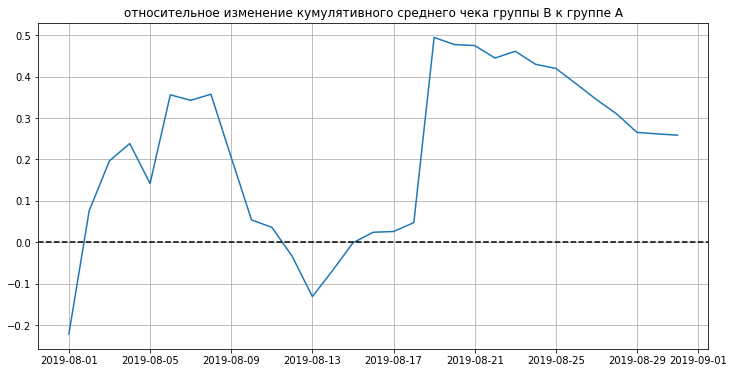

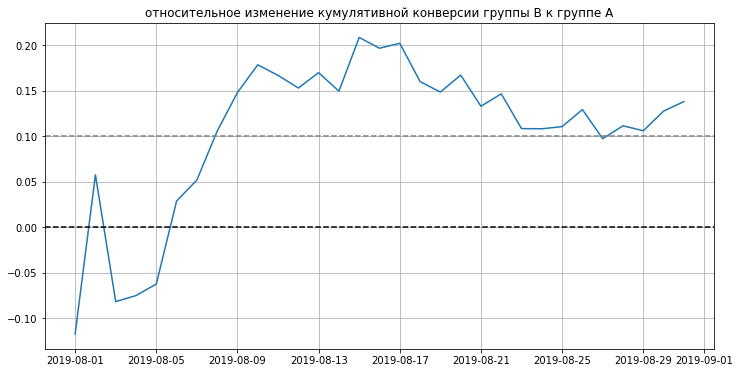

In [62]:
plt.figure(figsize=(12,6))
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

plt.figure(figsize=(12,6))
plt.title('относительное изменение кумулятивной конверсии группы B к группе A')
plt.plot(mergeCumulativeConversion['date']\
         , mergeCumulativeConversion['conversionB'] / mergeCumulativeConversion['conversionA'] - 1)
plt.grid()
plt.axhline(y=0, color='black', linestyle ='--')
plt.axhline(y=0.1, color='grey', linestyle ='--')
plt.show()

### Результат: 
Исходя из вышеперечисленных фактов принято решение об остановке теста и зафиксировать победу группы В, хоть средний чек не увеличился, но зато выросла конверсия пользователей. 

